In [1]:
import _pickle as cPickle
import numpy as np
import random
random.seed(1) # set a seed so that the results are consistent

#chargement du fichier cifar-10-batches-py qui contient 5 fichiers patchs
path = '/home/nafaa/Documents/projet_IA/cifar-10-batches-py/'

# recuperer le dictionnaire du premier patch
f1 = open(path+'data_batch_1', 'rb')
dict1 = cPickle.load(f1, encoding='latin1')

# récuperer le dictionnaire du 2ème patch 
f2 = open(path+'data_batch_2', 'rb')
dict2 = cPickle.load(f2, encoding='latin1')

f3 = open(path+'data_batch_3', 'rb')
dict3 = cPickle.load(f3, encoding='latin1')

f4 = open(path+'data_batch_4', 'rb')
dict4 = cPickle.load(f4, encoding='latin1')

f5 = open(path+'data_batch_5', 'rb')
dict5 = cPickle.load(f5, encoding='latin1')

images = [] # mettre les images de tous les fichiers dans un seul 

#recuperer les images de tous les patch
images1 = dict1['data'] # les images du patch 1
for i in images1 : 
    images.append(i)

    images2 = dict2['data']
for i in images2 :
    images.append(i)

images3 = dict3['data'] # les images du patch 3
for i in images3 :
    images.append(i)

images4 = dict4['data']
for i in images4 :
    images.append(i)

images5 = dict5['data']
for i in images5 :
    images.append(i)


# print(images) affichage du tableau de toutes les images

#images = np.reshape(images, (10000, 3, 32, 32))
labels = [] #mettre les labels de tous les fichiers dans un seul

# récuperer les labels des images 
labels1 = dict1['labels'] # labels des images du patch1 
for i in labels1 :
    labels.append(i)

labels2 = dict2['labels']
for i in labels2 :
    labels.append(i)

labels3 = dict3['labels'] # labels des images du patch 3
for i in labels3 :
    labels.append(i)

labels4 = dict4['labels']
for i in labels4 :
    labels.append(i)

labels5 = dict5['labels']
for i in labels5 :
    labels.append(i)

# print(labels) affichage des labels de toutes les images




In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# decouper les données du patch1 en deux ensembles (apprentissage et test)
# 80 % apprentissage et 20 % test 
xtrain, xtest, ytrain, ytest = train_test_split(images1,labels1, train_size=0.8)

# on pourrait meme utiliser toutes les données mais cela va prendre beaucoup de temps
# lors de l'execution 

/home/nafaa/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
# Découper une image en 4 patchs

def patch(data, labels, k = 4):
    patches = []
    patches_img = []
    lbl = []
    index = 0
    
    # prendre chaque image
    for im in data:
        #decouper l'image et enregistrer les patchs dans (patches_img)
        ps = np.split(im,k)
        patches_img.append(ps)
        # enregistrer tous les patchs dans le tableau patchs
        for p in ps:
            patches.append(p)
            lbl.append(labels[index])
        index+=1
    #retourner les patches et les labels 
    return patches, patches_img,lbl

In [4]:
# exemple sur le découpage des images en 4 patches
#on a pris l'exemple de deux images avec leurs labels 
x = [images1[0],images1[1]] 
y = [labels1[0],labels1[1]]
print(patch(x,y, k=4))

([array([ 59,  43,  50,  68,  98, 119, 139, 145, 149, 149, 131, 125, 142,
       144, 137, 129, 137, 134, 124, 139, 139, 133, 136, 139, 152, 163,
       168, 159, 158, 158, 152, 148,  16,   0,  18,  51,  88, 120, 128,
       127, 126, 116, 106, 101, 105, 113, 109, 112, 119, 109, 105, 125,
       127, 122, 131, 124, 121, 131, 132, 133, 133, 123, 119, 122,  25,
        16,  49,  83, 110, 129, 130, 121, 113, 112, 112, 106, 105, 128,
       124, 130, 127, 122, 115, 120, 130, 131, 139, 127, 126, 127, 130,
       142, 130, 118, 120, 109,  33,  38,  87, 106, 115, 117, 114, 105,
       107, 121, 125, 109, 113, 146, 133, 127, 118, 117, 127, 122, 132,
       137, 136, 131, 124, 130, 132, 135, 130, 125, 121,  94,  50,  59,
       102, 127, 124, 121, 120, 114, 107, 125, 129, 106, 108, 124, 121,
       108,  98, 110, 117, 120, 134, 140, 131, 141, 135, 127, 121, 119,
       103,  87,  75,  67,  71,  84, 110, 129, 136, 131, 129, 119, 108,
       122, 123, 105, 107, 111, 108,  98,  94,  97,  83,  88, 

In [5]:
# creation des clusters
def K_means(k, images, centroids, taille, max_iter):
    # clusters initialisés à vide 
    clusters = None
    labels = None
    meme = False 
    # nombre d'térations initialisées à 0
    it = 0
    
    while (not(meme) and it < max_iter):
        # on copie les centroids de l'itération précédente 
        last_centroids = list(centroids)
        
        # On reinitialise les clusters
        clusters = [[] for x in range(k)]
        labels = [[] for x in range(k)]

        # On associe un cluster a chaque image
        for j in range(taille): # Pour chaque image
            # calculer la distance entre l'image en question et le centroid du premier cluster
            d = np.linalg.norm(images[j] - centroids[0])
            c = 0 # prenons le centroid 0 comme etant le plus proche
            for i in range(1, k):
                # mettre a jour le centroid le plus proche
                #en calculant la distance entre l'image et les autres clusters
                dist = np.linalg.norm(images[j] - centroids[i])
                if (d > dist):
                    c = i
                    d = dist
                    clusters[c].append(images[j]) # affecter une image à un cluster
                    labels[c].append(j) # enregistre les labels des images 

        # Mise a jour de chaque centroids en faisant la moyenne des points
        for i in range(k):
            # calculer la moyenne des clusters 
            if (len(clusters[i]) != 0):
                moy=np.mean(clusters[i],axis=0) # calculer la moyenne 
            else:
                moy = np.mean([0],axis=0)
            centroids[i] = np.copy(moy)
        

        # Tester si les centroids de l'itération précédente == centroids de l'itération actuelle
        meme = True
        for i in range(k):
            # np.array_equal (x,y) renvoie true si x == y
            if (not(np.array_equal(centroids[i],last_centroids[i]))):
                meme = False
        
        it+=1
    # retourner les clusters, centroides et labels
    return clusters, centroids, labels


In [6]:
nb_clusters = 10 

# création de 10 centroides (10 tableaux de 3072 valeurs comprises entre 0 et 256)
centroids = [ np.random.randint(256, size=3072) for x in range(nb_clusters)]

# application du K_means sur les images de patch1
cl, centr, lab = K_means(nb_clusters, images1, centroids, len(images1), 10)

In [8]:
# calculer le taux d'erreur pour chaque cluster 
def k_means_prediction (clusters, centroids, labels, real_labels, erreur):
    for i in range(len(clusters)):
        classes = [0 for x in range(10)]
        # Calcul de la classe dominante
        for j in range(len(clusters[i])):
            classes[ real_labels[labels[i][j]] ] += 1
        # On détermine quelle classe est la plus représentée
        ind = 0
        value = classes[0]
        for j in range (1, len(classes)):
            if (classes[j] > value):
                ind = j
                value = classes[j]

        # On détermine le taux d'erreurs par clusters
        errors = 0
        for j in range(len(clusters[i])):
            if(ind != real_labels[labels[i][j]]):
                errors+=1
        if(len(clusters[i]) != 0):
            print("le nombre d'elements du cluster ",i," est :",len(clusters[i]))
            print("le taux d'erreurs est :", (float(errors)/ len(clusters[i])))
            print("----------------------------------------------------------")            
            erreur.append(float(errors)/ len(clusters[i]))            
        else:
            print("le cluster ",i,"est vide")
    print("le taux d'erreur moyen est",np.sum(erreur)/10)    
    return erreur   

In [9]:
error = []
eval_k_means_per_classes(cl , centr , lab, labels1, error )

le cluster  0 est vide
le nombre d'elements du cluster  1  est : 9748
le taux d'erreurs est : 0.8954657365613459
----------------------------------------------------------
le nombre d'elements du cluster  2  est : 2386
le taux d'erreurs est : 0.7803855825649623
----------------------------------------------------------
le nombre d'elements du cluster  3  est : 3141
le taux d'erreurs est : 0.8287169691181152
----------------------------------------------------------
le nombre d'elements du cluster  4  est : 668
le taux d'erreurs est : 0.6586826347305389
----------------------------------------------------------
le nombre d'elements du cluster  5  est : 1523
le taux d'erreurs est : 0.7202889034799738
----------------------------------------------------------
le nombre d'elements du cluster  6  est : 1157
le taux d'erreurs est : 0.8115816767502161
----------------------------------------------------------
le nombre d'elements du cluster  7  est : 589
le taux d'erreurs est : 0.616298811544

[0.8954657365613459,
 0.7803855825649623,
 0.8287169691181152,
 0.6586826347305389,
 0.7202889034799738,
 0.8115816767502161,
 0.6162988115449916,
 0.7916230366492146,
 0.8050660792951542]

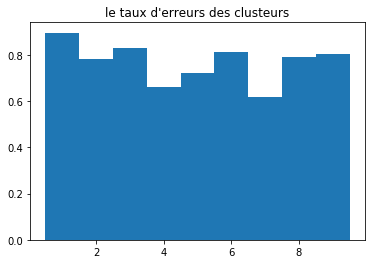

In [10]:
# affichage des taux d'erreur des clusters 
import matplotlib.pyplot as plt
#diagramme en batons 
fig = plt.figure()
#les clusters sachant que le cluster 0 est vide 
x = [1,2,3,4,5,6,7,8,9]
width = 1.0
plt.bar(x, error, width)
plt.title("le taux d'erreurs des clusteurs")
plt.savefig('erreurs.png')
# fonction d'affichage du diagramme en batons
plt.show()